In [60]:
import pandas as pd
import functools
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
plt.style.use('ggplot')

# Loading the Data/First Looks

In [5]:
cols = ['book_authors', 'book_rating','book_rating_count', 'book_review_count', 'book_title', 'genres']
books = pd.read_csv('book_data.csv', usecols = cols).dropna()

In [6]:
books.head()

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction
2,Harper Lee,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance
4,Stephenie Meyer,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...


In [102]:
print(books.describe())

        book_rating  book_rating_count  book_review_count  Sequential Art  \
count  51059.000000       5.105900e+04       51059.000000    51059.000000   
mean       4.006074       4.625927e+04        2138.538534        0.033804   
std        0.298442       2.190145e+05        7848.260391        0.180726   
min        0.000000       0.000000e+00           0.000000        0.000000   
25%        3.820000       6.310000e+02          50.000000        0.000000   
50%        4.020000       3.345000e+03         223.000000        0.000000   
75%        4.200000       1.428800e+04         911.000000        0.000000   
max        5.000000       5.588580e+06      160776.000000        1.000000   

       Autobiography      Religion  Short Stories    Philosophy         Crime  \
count   51059.000000  51059.000000   51059.000000  51059.000000  51059.000000   
mean        0.034529      0.035586       0.036174      0.037995      0.040737   
std         0.182585      0.185258       0.186724      0.191187

In [8]:
print(books.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51059 entries, 0 to 54300
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_authors       51059 non-null  object 
 1   book_rating        51059 non-null  float64
 2   book_rating_count  51059 non-null  int64  
 3   book_review_count  51059 non-null  int64  
 4   book_title         51059 non-null  object 
 5   genres             51059 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB
None


In [9]:
books.describe()

,book_rating,book_rating_count,book_review_count
count,51059.000000,5.105900e+04,51059.000000
mean,4.006074,4.625927e+04,2138.538534
std,0.298442,2.190145e+05,7848.260391
min,0.000000,0.000000e+00,0.000000
25%,3.820000,6.310000e+02,50.000000
50%,4.020000,3.345000e+03,223.000000
75%,4.200000,1.428800e+04,911.000000
max,5.000000,5.588580e+06,160776.000000


In [10]:
genres = books['genres']

In [11]:
books['genreDicts'] = genres.apply(pipesToDict)

In [12]:
books['genres'] = genres.apply(lambda x: str(x).split('|'))

In [13]:
genresDicts= list(books['genreDicts'].values)

In [14]:
genrecount = functools.reduce(genreCounts, genresDicts)

In [15]:
{k: v for k, v in sorted(genrecount.items(), key=lambda item: item[1])[-30:]}

{'Sequential Art': 1726,
 'Autobiography': 1763,
 'Religion': 1817,
 'Short Stories': 1847,
 'Philosophy': 1940,
 'Crime': 2080,
 'Contemporary Romance': 2115,
 'Humor': 2151,
 'Adventure': 2267,
 'Horror': 2316,
 'Biography': 2370,
 'Novels': 2553,
 'History': 2683,
 'European Literature': 2954,
 'Thriller': 3045,
 'Literature': 3792,
 'Childrens': 3966,
 'Cultural': 4972,
 'Science Fiction': 5137,
 'Paranormal': 5176,
 'Mystery': 5681,
 'Contemporary': 6064,
 'Classics': 6316,
 'Historical Fiction': 6408,
 'Historical': 7120,
 'Nonfiction': 7727,
 'Young Adult': 10533,
 'Romance': 12899,
 'Fantasy': 14295,
 'Fiction': 26007}

In [16]:
#print(genresList)

In [17]:
def pipesToDict(words):
    wordList = str(words).split('|')
    d = {}
    for word in wordList:
        if word in d:
            d[word] += 1
        else:
            d[word] = 1
    return d

In [18]:
def genreCounts(d1, d2):
    result = d1.copy()
    for word in d2.keys():
        if word in result:
            result[word] += 1
        else:
            result[word] = 1
    return result

In [19]:
topGenres = [ k for k, v in sorted(genrecount.items(), key=lambda item: item[1])[-30:]]

In [20]:
books.head(5)

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...","{'Young Adult': 1, 'Fiction': 1, 'Science Fict..."
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]","{'Fantasy': 1, 'Young Adult': 1, 'Fiction': 1}"
2,Harper Lee,4.27,3745197,79450,To Kill a Mockingbird,"[Classics, Fiction, Historical, Historical Fic...","{'Classics': 1, 'Fiction': 1, 'Historical': 1,..."
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,54322,Pride and Prejudice,"[Classics, Fiction, Romance]","{'Classics': 1, 'Fiction': 1, 'Romance': 1}"
4,Stephenie Meyer,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...","{'Young Adult': 1, 'Fantasy': 2, 'Romance': 1,..."


In [21]:
for genre in topGenres:
    books[genre] = books['genres'].apply(lambda x: 1 if genre in x else 0)

In [22]:
books.head(5)

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...","{'Young Adult': 1, 'Fiction': 1, 'Science Fict...",0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]","{'Fantasy': 1, 'Young Adult': 1, 'Fiction': 1}",0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,Harper Lee,4.27,3745197,79450,To Kill a Mockingbird,"[Classics, Fiction, Historical, Historical Fic...","{'Classics': 1, 'Fiction': 1, 'Historical': 1,...",0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,4.25,2453620,54322,Pride and Prejudice,"[Classics, Fiction, Romance]","{'Classics': 1, 'Fiction': 1, 'Romance': 1}",0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,Stephenie Meyer,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...","{'Young Adult': 1, 'Fantasy': 2, 'Romance': 1,...",0,0,0,...,0,0,0,0,0,0,1,1,1,1


(array([15.,  2.,  7.,  2.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 1726.        ,  3344.73333333,  4963.46666667,  6582.2       ,
         8200.93333333,  9819.66666667, 11438.4       , 13057.13333333,
        14675.86666667, 16294.6       , 17913.33333333, 19532.06666667,
        21150.8       , 22769.53333333, 24388.26666667, 26007.        ]),
 <a list of 15 Patch objects>)

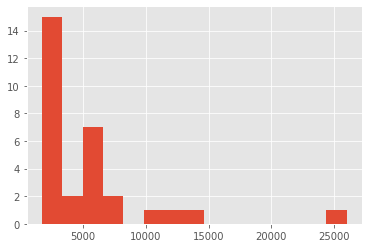

In [23]:
keys = topGenres
values = [genrecount[genre] for genre in keys]

plt.hist(values, bins = 15)

In [24]:
genreAverages = []
for genre in topGenres:
    genreAverages.append(books.groupby(genre).mean()['book_rating'].values[1])
print(genreAverages)

[4.176315179606029, 4.008706749858199, 4.15644468904788, 3.996756903086102, 4.052489690721652, 3.952533653846155, 4.039895981087473, 3.980181311018132, 4.0406484340538045, 3.930988773747837, 4.034464135021088, 3.8982530356443483, 4.0719008572493465, 3.932610020311438, 3.918755336617404, 3.9479720464134944, 4.050015128593043, 3.9598551890587372, 3.9783158099688447, 4.003276661514693, 3.932112304171784, 3.9317183377308793, 4.008909119696, 3.983893570536835, 3.983907303370789, 4.059059143263883, 3.9793866894521974, 4.001862935111241, 4.035298356068542, 3.956342523166868]


In [25]:
nonGenreAverages = []
for genre in topGenres:
    nonGenreAverages.append(books.groupby(genre).mean()['book_rating'].values[0])

In [126]:
genreReviewCounts = []
for genre in topGenres:
    genreReviewCounts.append(books.groupby(genre).mean()['book_rating_count'].values[1])
print(genreReviewCounts)

[11918.775202780997, 35025.35394214407, 11549.716565767749, 16257.700595560369, 36444.520103092786, 54230.80528846154, 16962.348463356975, 28904.868433286843, 67149.54830172034, 42951.701208981, 28144.643459915613, 85720.90129259694, 17668.06522549385, 13425.287745429925, 56811.6183908046, 103485.77478902953, 47710.883509833584, 21796.99698310539, 95573.14232866044, 34784.447836166924, 40160.87801443408, 45938.92150395778, 146987.72878404052, 65321.4556803995, 59782.80786516854, 17669.935162417496, 82996.23715940378, 44158.33863090162, 65735.61126267926, 75361.46383665936]


In [125]:
nonGenreReviewCounts = []
for genre in topGenres:
    nonGenreReviewCounts.append(books.groupby(genre).mean()['book_rating_count'].values[0])
print(nonGenreReviewCounts)

[47460.72709950743, 46661.030448717946, 47540.02723285001, 47385.26950743721, 46646.90826360472, 45920.737070989606, 47525.26334177836, 47022.521550666555, 45288.65039350713, 46416.42319922861, 47141.018525745036, 44182.29487073764, 47844.97347858442, 48275.513065169944, 45590.04619485983, 41668.26322804494, 46137.015947168366, 48898.326794974724, 40744.03233673758, 47553.72477824031, 47022.740270615715, 46302.438848760976, 32040.260174775944, 43523.59337976753, 44067.87282368739, 51357.34023354565, 36711.06178749445, 46969.42992662474, 38686.24994559895, 16047.671483314705]


In [27]:
genreBookCounts = []
for genre in topGenres:
    genreBookCounts.append(books.groupby(genre).count()['book_title'].values[1])
print(genreBookCounts)

[1726, 1763, 1817, 1847, 1940, 2080, 2115, 2151, 2267, 2316, 2370, 2553, 2683, 2954, 3045, 3792, 3966, 4972, 5136, 5176, 5681, 6064, 6316, 6408, 7120, 7727, 10533, 12899, 14295, 26007]


In [28]:
genreAuthorCounts = []
for genre in topGenres:
    genreAuthorCounts.append(books.groupby(genre)['book_authors'].nunique().values[1])
print(genreBookCounts)

[1726, 1763, 1817, 1847, 1940, 2080, 2115, 2151, 2267, 2316, 2370, 2553, 2683, 2954, 3045, 3792, 3966, 4972, 5136, 5176, 5681, 6064, 6316, 6408, 7120, 7727, 10533, 12899, 14295, 26007]


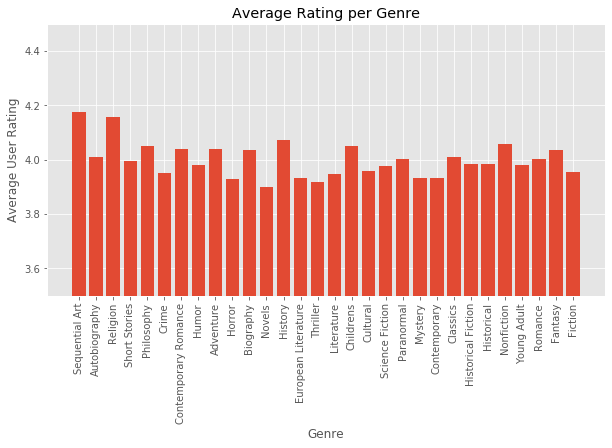

In [29]:
plt.figure(figsize=(10,5))
plt.bar(x = topGenres, height= genreAverages)
plt.ylim(3.5, 4.5)
plt.xticks(rotation = 90)
plt.ylabel('Average User Rating')
plt.xlabel('Genre')
plt.title('Average Rating per Genre')
plt.savefig('Ratings.png')
pass

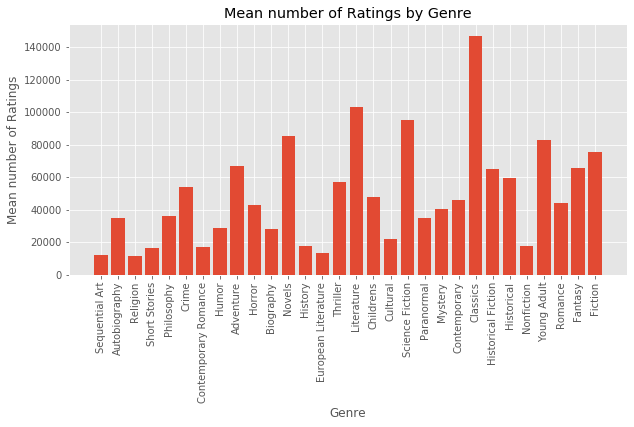

In [139]:
plt.figure(figsize=(10,6))
plt.bar(x = topGenres, height= genreReviewCounts)
plt.xticks(rotation = 90)

plt.gcf().subplots_adjust(bottom=0.3)
plt.ylabel('Mean number of Ratings')
plt.xlabel('Genre')
plt.title('Mean number of Ratings by Genre')
plt.savefig('RatingsPerBook.png')
plt.savefig('meanRatings.png')
pass

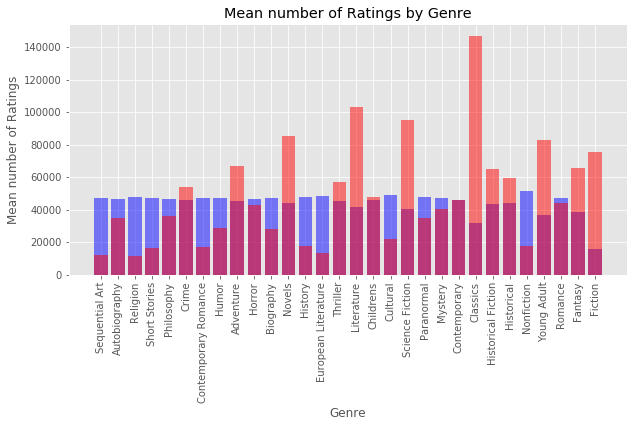

In [140]:
plt.figure(figsize=(10,6))
plt.bar(x = topGenres, height= nonGenreReviewCounts, alpha = .5, color = colors)
plt.bar(x = topGenres, height= genreReviewCounts, alpha = .5, color = compColors)
plt.xticks(rotation = 90)

plt.gcf().subplots_adjust(bottom=0.3)
plt.ylabel('Mean number of Ratings')
plt.xlabel('Genre')
plt.title('Mean number of Ratings by Genre')
plt.savefig('RatingsPerBook.png')
plt.savefig('meanRatingsComped.png')
pass

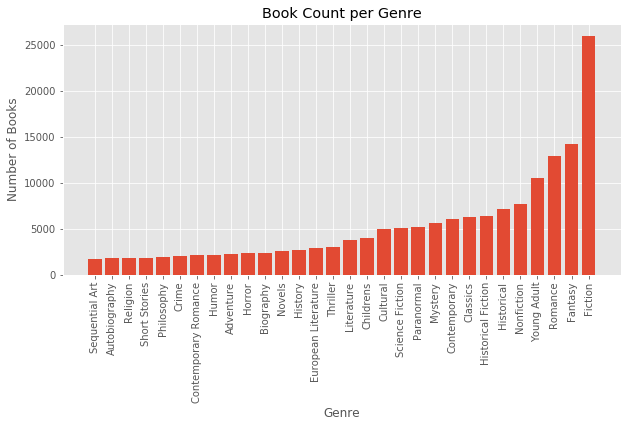

In [114]:
plt.figure(figsize=(10,6))
plt.bar(x = topGenres, height= genreBookCounts)
plt.xticks(rotation = 90)
plt.gcf().subplots_adjust(bottom=0.3)

plt.ylabel('Number of Books')
plt.xlabel('Genre')
plt.title('Book Count per Genre')
plt.savefig('BookCount.png')


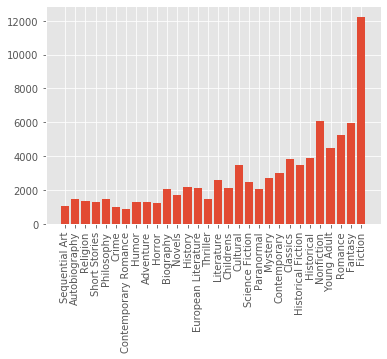

In [32]:
plt.bar(x = topGenres, height= genreAuthorCounts)
plt.xticks(rotation = 90)
pass

Interesting numbers:

num reviews vs num books

num authors per num books


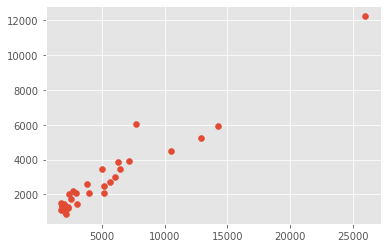

In [33]:
plt.scatter(x = genreBookCounts, y = genreAuthorCounts)

In [34]:
ReviewPerBooksRatio = []
for i in range(len(genreReviewCounts)):
    ReviewPerBooksRatio.append(genreReviewCounts[i]/genreBookCounts[i])

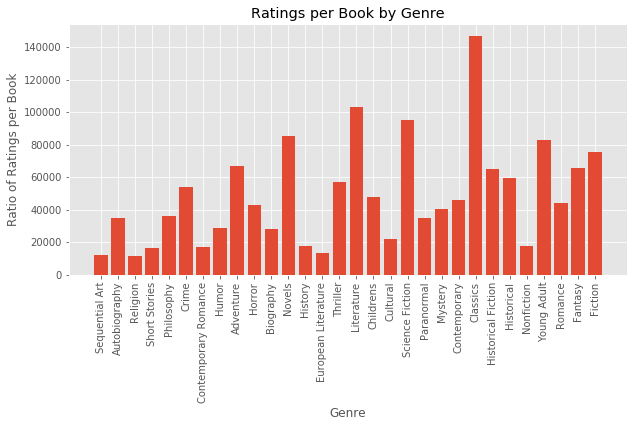

In [122]:
plt.figure(figsize=(10,6))
plt.bar(x = topGenres, height = ReviewPerBooksRatio)
plt.xticks(rotation = 90)
plt.gcf().subplots_adjust(bottom=0.3)
plt.ylabel('Ratio of Ratings per Book')
plt.xlabel('Genre')
plt.title('Ratings per Book by Genre')
plt.savefig('RatingsPerBook.png')
pass

# Young Adult Fantasy vs Non Young Adult Fantasy

In [36]:
FantasyBooks = books[books['Fantasy'] == 1]

In [37]:
FantasyBooks.head()

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...","{'Young Adult': 1, 'Fiction': 1, 'Science Fict...",0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]","{'Fantasy': 1, 'Young Adult': 1, 'Fiction': 1}",0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,Stephenie Meyer,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...","{'Young Adult': 1, 'Fantasy': 2, 'Romance': 1,...",0,0,0,...,0,0,0,0,0,0,1,1,1,1
6,C.S. Lewis|Pauline Baynes,4.25,437829,9439,The Chronicles of Narnia,"[Fantasy, Classics, Fiction, Young Adult, Chil...","{'Fantasy': 1, 'Classics': 1, 'Fiction': 1, 'Y...",0,0,0,...,0,0,1,0,0,0,1,0,1,1
7,George Orwell,3.90,2235084,42156,Animal Farm,"[Classics, Fiction, Science Fiction, Dystopia,...","{'Classics': 1, 'Fiction': 1, 'Science Fiction...",0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [38]:
FantasyYA = FantasyBooks[FantasyBooks['Young Adult'] == 1]
FantasyNYA = FantasyBooks[FantasyBooks['Young Adult'] == 0]

In [39]:
FantasyYA.head()

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
0,Suzanne Collins,4.33,5519135,160706,The Hunger Games,"[Young Adult, Fiction, Science Fiction, Dystop...","{'Young Adult': 1, 'Fiction': 1, 'Science Fict...",0,0,0,...,0,0,0,0,0,0,1,0,1,1
1,J.K. Rowling|Mary GrandPré,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,"[Fantasy, Young Adult, Fiction]","{'Fantasy': 1, 'Young Adult': 1, 'Fiction': 1}",0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,Stephenie Meyer,3.58,4281268,97991,Twilight,"[Young Adult, Fantasy, Romance, Paranormal, Va...","{'Young Adult': 1, 'Fantasy': 2, 'Romance': 1,...",0,0,0,...,0,0,0,0,0,0,1,1,1,1
6,C.S. Lewis|Pauline Baynes,4.25,437829,9439,The Chronicles of Narnia,"[Fantasy, Classics, Fiction, Young Adult, Chil...","{'Fantasy': 1, 'Classics': 1, 'Fiction': 1, 'Y...",0,0,0,...,0,0,1,0,0,0,1,0,1,1
19,Veronica Roth,4.22,2493519,104329,Divergent,"[Young Adult, Science Fiction, Dystopia, Ficti...","{'Young Adult': 1, 'Science Fiction': 1, 'Dyst...",0,0,0,...,0,0,0,0,0,0,1,0,1,1


In [40]:
FantasyNYA.head()

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
7,George Orwell,3.90,2235084,42156,Animal Farm,"[Classics, Fiction, Science Fiction, Dystopia,...","{'Classics': 1, 'Fiction': 1, 'Science Fiction...",0,0,0,...,0,0,1,0,0,0,0,0,1,1
9,J.R.R. Tolkien,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,"[Fantasy, Fiction, Classics]","{'Fantasy': 1, 'Fiction': 1, 'Classics': 1}",0,0,0,...,0,0,1,0,0,0,0,0,1,1
11,Douglas Adams,4.21,1155911,23919,The Hitchhiker's Guide to the Galaxy,"[Science Fiction, Fiction, Humor, Fantasy, Cla...","{'Science Fiction': 1, 'Fiction': 1, 'Humor': ...",0,0,0,...,0,0,1,0,0,0,0,0,1,1
16,Lewis Carroll|John Tenniel|Martin Gardner,4.07,411153,9166,Alice's Adventures in Wonderland & Through the...,"[Classics, Fantasy, Fiction, Childrens]","{'Classics': 1, 'Fantasy': 1, 'Fiction': 1, 'C...",0,0,0,...,0,0,1,0,0,0,0,0,1,1
17,Oscar Wilde|Jeffrey Eugenides,4.06,775701,22938,The Picture of Dorian Gray,"[Fiction, Classics, Horror, Fantasy, Literatur...","{'Fiction': 1, 'Classics': 2, 'Horror': 1, 'Fa...",0,0,0,...,0,0,1,0,0,0,0,0,1,1


(array([1.000e+00, 5.000e+00, 4.600e+01, 2.010e+02, 8.910e+02, 1.724e+03,
        1.782e+03, 8.880e+02, 1.830e+02, 1.100e+01]),
 array([2.56 , 2.804, 3.048, 3.292, 3.536, 3.78 , 4.024, 4.268, 4.512,
        4.756, 5.   ]),
 <a list of 10 Patch objects>)

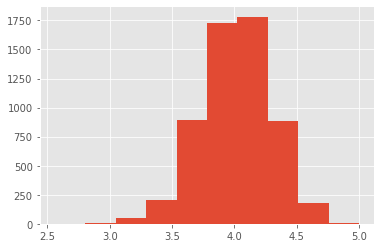

In [41]:
plt.hist(FantasyYA['book_rating'])


(array([1.000e+00, 1.000e+00, 3.000e+00, 2.000e+01, 1.710e+02, 9.120e+02,
        3.159e+03, 3.252e+03, 9.520e+02, 9.200e+01]),
 array([1.85 , 2.165, 2.48 , 2.795, 3.11 , 3.425, 3.74 , 4.055, 4.37 ,
        4.685, 5.   ]),
 <a list of 10 Patch objects>)

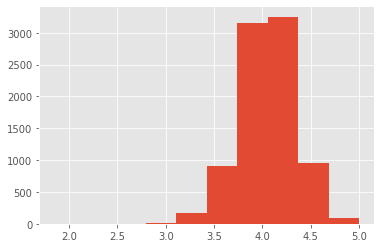

In [42]:
plt.hist(FantasyNYA['book_rating'])

Cross section of genres

In [44]:
#h0 the mean user rating of YA fantasy books is the same as the mean rating of Non YA fantasy books
#ha they're different

stats.ttest_ind(FantasyYA['book_rating'], FantasyNYA['book_rating'], equal_var=False)

Ttest_indResult(statistic=-5.508841865686684, pvalue=3.6832691175429616e-08)

In [45]:
print(len(FantasyNYA))

8563


In [46]:
colors = []
compColors = []
for genre in topGenres:
    inGenre = books[books[genre] == 1]
    outGenre = books[books[genre] == 0]
    print(genre, stats.ttest_ind(inGenre['book_rating'], outGenre['book_rating'], equal_var=False)[1])
    colors.append('b')
    compColors.append('r')
    

Sequential Art 1.1931176781062184e-130
Autobiography 0.6643499511484978
Religion 3.0180218256097446e-97
Short Stories 0.15456978475208738
Philosophy 8.376618208703289e-16
Crime 1.483598658946656e-23
Contemporary Romance 4.130630248379327e-11
Humor 6.275382427174675e-05
Adventure 4.0900654938743523e-10
Horror 6.964702166070827e-32
Biography 1.3691799193012392e-07
Novels 4.1996525390915256e-72
History 2.1839457009249253e-41
European Literature 1.008013901527007e-40
Thriller 5.275563266986821e-74
Literature 1.512130083531845e-38
Childrens 1.8741667694416372e-28
Cultural 9.361204249668238e-33
Science Fiction 2.279642646186596e-13
Paranormal 0.4537097074815539
Mystery 3.5855444775494675e-108
Contemporary 2.1936973991346574e-101
Classics 0.3621904453470356
Historical Fiction 1.3012775786490421e-12
Historical 8.33848625852868e-14
Nonfiction 1.1968712034346987e-72
Young Adult 8.485019709312739e-27
Romance 0.055619492879654654
Fantasy 2.772015687443849e-45
Fiction 0.0


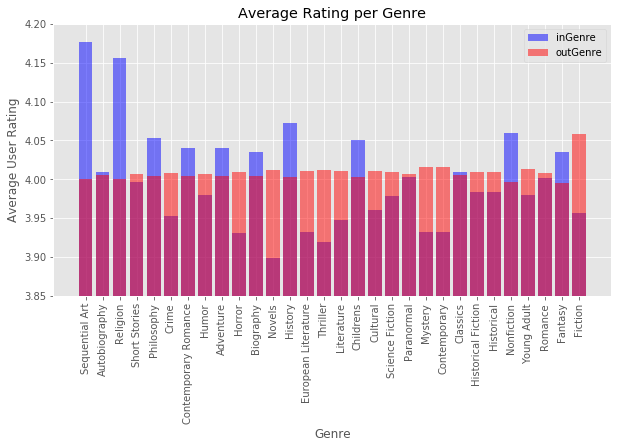

In [143]:
plt.figure(figsize=(10,5))
plt.bar(x = topGenres, height= genreAverages, color = colors, alpha = .5, label = 'inGenre')
plt.bar(x = topGenres, height= nonGenreAverages, color = compColors, alpha = .5, label = 'outGenre')
plt.ylim(3.85, 4.2)
plt.xticks(rotation = 90)
plt.ylabel('Average User Rating')
plt.xlabel('Genre')
plt.title('Average Rating per Genre')
plt.legend()
plt.savefig('Ratings.png')
pass

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 7.0000e+00,
        1.2700e+02, 2.2710e+03, 2.1425e+04, 2.5159e+04, 2.0660e+03]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

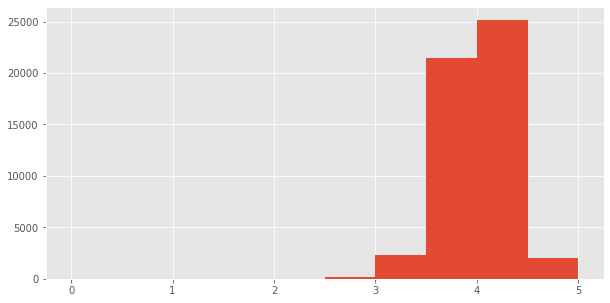

In [48]:
plt.figure(figsize=(10,5))
plt.hist(books['book_rating'])

In [123]:
for genre in topGenres:
    inGenre = books[books[genre] == 1]
    outGenre = books[books[genre] == 0]
    print(genre, stats.ttest_ind(inGenre['book_rating_count'], outGenre['book_rating_count'], equal_var=False)[1])
    

Sequential Art 6.822594451169078e-168
Autobiography 0.002971279522157497
Religion 3.682215139799608e-132
Short Stories 4.371010809423833e-87
Philosophy 0.0019525218856833234
Crime 0.08749050366698732
Contemporary Romance 1.2927096391012463e-111
Humor 1.6241368921026749e-18
Adventure 0.0011994079134876267
Horror 0.20766531218529435
Biography 3.676291307379435e-10
Novels 5.138145316333394e-08
History 7.295713892040424e-34
European Literature 6.012395138907308e-107
Thriller 0.007381918937779591
Literature 1.3136431151553282e-26
Childrens 0.6577450823771334
Cultural 1.9078391973037118e-69
Science Fiction 3.835043501197024e-24
Paranormal 1.9772870294679004e-07
Mystery 0.006466571367927357
Contemporary 0.8810386549006141
Classics 1.0610235782148845e-98
Historical Fiction 1.8118272775423037e-09
Historical 1.9419818741850863e-06
Nonfiction 1.2909248427827869e-111
Young Adult 1.977877330202468e-41
Romance 0.19673766246401894
Fantasy 1.2593194096071709e-26
Fiction 8.187407484226313e-213


In [49]:
books['book_rating'].std()

0.298442180791513

In [50]:
list(zip(genreAverages, nonGenreAverages))

[(4.176315179606029, 4.0001173656578946),
 (4.008706749858199, 4.005979389808513),
 (4.15644468904788, 4.0005249583688745),
 (3.996756903086102, 4.0064232301064875),
 (4.052489690721652, 4.004240314338653),
 (3.952533653846155, 4.0083472508626246),
 (4.039895981087473, 4.004612005557384),
 (3.980181311018132, 4.007212317003355),
 (4.0406484340538045, 4.004467125758329),
 (3.930988773747837, 4.009641179246261),
 (4.034464135021088, 4.004691614122293),
 (3.8982530356443483, 4.011748443491542),
 (4.0719008572493465, 4.002422688936666),
 (3.932610020311438, 4.0105847624987145),
 (3.918755336617404, 4.011611196734302),
 (3.9479720464134944, 4.010734762096177),
 (4.050015128593043, 4.002372964134806),
 (3.9598551890587372, 4.011059734849306),
 (3.9783158099688447, 4.0091779718224),
 (4.003276661514693, 4.006389076564311),
 (3.932112304171784, 4.0153329807395615),
 (3.9317183377308793, 4.016094454939449),
 (4.008909119696, 4.005673289676595),
 (3.983893570536835, 4.009256679581643),
 (3.98390

In [51]:
books[(books['Historical'] == 1) & (books['Historical Fiction'] == 0)]

,book_authors,book_rating,book_rating_count,book_review_count,book_title,genres,genreDicts,Sequential Art,Autobiography,Religion,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
535,Leo Tolstoy|Henry Gifford|Aylmer Maude|Louise ...,4.10,224452,9233,War and Peace,"[Classics, Fiction, Literature, War, Historica...","{'Classics': 1, 'Fiction': 1, 'Literature': 3,...",0,0,0,...,0,0,1,0,1,0,0,1,0,1
555,Laura Ingalls Wilder|Garth Williams,4.19,225532,3662,Little House on the Prairie,"[Classics, Childrens, Fiction, Young Adult, Hi...","{'Classics': 1, 'Childrens': 1, 'Fiction': 1, ...",0,0,0,...,0,0,1,0,1,0,1,0,0,1
624,Howard Zinn,4.08,154448,4748,A People's History of the United States,"[Nonfiction, History, North American Hi..., Am...","{'Nonfiction': 1, 'History': 1, 'North America...",0,0,0,...,0,0,0,0,1,1,0,0,0,0
671,Dee Brown,4.22,48845,2708,Bury My Heart at Wounded Knee: An Indian Histo...,"[History, Nonfiction, North American Hi..., Am...","{'History': 1, 'Nonfiction': 1, 'North America...",0,0,0,...,0,0,1,0,1,1,0,0,0,0
1257,Founding Fathers,4.55,22007,420,The Constitution of the United States of America,"[History, Nonfiction, Politics, Classics, Phil...","{'History': 1, 'Nonfiction': 1, 'Politics': 2,...",0,0,0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54098,G.J. Barker-Benfield,3.87,23,0,The Culture of Sensibility: Sex and Society in...,"[History, Criticism, Historical, Nonfiction, G...","{'History': 1, 'Criticism': 1, 'Historical': 1...",0,0,0,...,0,0,0,0,1,1,0,0,0,0
54129,Pierre Abélard|Henry Adams Bellows|Ralph Adams...,3.54,341,19,The Story of My Misfortunes,"[Philosophy, History, Historical, Medieval, No...","{'Philosophy': 1, 'History': 1, 'Historical': ...",0,1,1,...,0,0,0,0,1,1,0,0,0,0
54138,Catherine Hart,4.00,118,10,Charmed,"[Science Fiction, Time Travel, Romance, Histor...","{'Science Fiction': 1, 'Time Travel': 1, 'Roma...",0,0,0,...,0,0,0,0,1,0,0,1,1,0
54149,Christopher Henry Dawson,3.59,51,6,Mission to Asia,"[History, Historical, Medieval, Nonfiction]","{'History': 1, 'Historical': 1, 'Medieval': 1,...",0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [52]:
pval_matrix = []
for genre1 in topGenres:
    row = []
    for genre2 in topGenres:
        genre1Data = books[books[genre1] == 1]
        genre2Data = books[books[genre2] == 1]
        
        row.append(stats.ttest_ind(genre1Data['book_rating'], genre2Data['book_rating'], equal_var=False)[1])
    pval_matrix.append(row)

In [53]:
print(pval_matrix)

[[1.0, 2.776694383498845e-74, 0.036847124347846295, 1.3888823668737685e-78, 2.297821304149408e-44, 6.159706096617001e-141, 3.559683698354753e-58, 1.5482300069783945e-93, 4.080541419705237e-54, 3.0031005933572545e-144, 5.959156969342626e-60, 8.518402326992155e-193, 1.4195941069568407e-36, 1.2917697001172048e-160, 1.1247814167382795e-194, 2.1461123316852058e-161, 4.003208541389399e-58, 1.2541222620288657e-155, 7.703362709023969e-134, 1.619382833429607e-105, 5.7073018361713275e-202, 1.462009887424936e-199, 4.037697534669483e-106, 1.1057263052329061e-135, 2.8503489389278423e-137, 4.0737465924281765e-56, 5.464427715500305e-147, 3.7896544619780525e-121, 1.1437983239915653e-83, 6.01815076429406e-186], [2.776694383498845e-74, 1.0, 1.312813169207598e-55, 0.1868456963046017, 2.246003341294377e-07, 6.157330915292513e-12, 0.00010031500800598768, 0.0015706778632758021, 0.00012335990669815741, 3.988342466214613e-18, 0.0017415370777050321, 3.035861904633718e-37, 1.0997563695327208e-15, 7.728407197597

In [54]:
for i in range(len(topGenres)):
    for j in range(len(topGenres)):
        if pval_matrix[i][j] > .05 and i!=j:
            print(topGenres[i], topGenres[j], pval_matrix[i][j])

Autobiography Short Stories 0.1868456963046017
Autobiography Paranormal 0.45562440355411493
Autobiography Classics 0.9767526677919927
Autobiography Romance 0.30189565714220445
Short Stories Autobiography 0.1868456963046017
Short Stories Humor 0.07712716125218694
Short Stories Paranormal 0.39822540913727666
Short Stories Classics 0.10080107849501313
Short Stories Historical Fiction 0.08278180290086001
Short Stories Historical 0.0805658495263296
Short Stories Romance 0.4725586094764711
Philosophy Contemporary Romance 0.10416962218291687
Philosophy Adventure 0.14186830828449615
Philosophy Childrens 0.7262384731680771
Philosophy Nonfiction 0.3180995494915724
Crime Literature 0.5174835628651802
Crime Cultural 0.27475250861214046
Crime Fiction 0.4981992700343463
Contemporary Romance Philosophy 0.10416962218291687
Contemporary Romance Adventure 0.9212171246640092
Contemporary Romance Biography 0.4694717707834424
Contemporary Romance Childrens 0.12223811150263576
Contemporary Romance Fantasy 0

In [83]:
depedence_matrix = []
for genre1 in topGenres:
    row = []
    print(genre1)
    for genre2 in topGenres:
        genre1Data = books[(books[genre1] == 1) & (books[genre2] == 1)]
        numEntries = len(genre1Data)
        numBooks = books[books[genre1] == 1].count()[genre1]
        
        row.append(numEntries/numBooks)
    depedence_matrix.append(row)

Sequential Art
Autobiography
Religion
Short Stories
Philosophy
Crime
Contemporary Romance
Humor
Adventure
Horror
Biography
Novels
History
European Literature
Thriller
Literature
Childrens
Cultural
Science Fiction
Paranormal
Mystery
Contemporary
Classics
Historical Fiction
Historical
Nonfiction
Young Adult
Romance
Fantasy
Fiction


In [84]:
def get_min_of_genre(mtx):
    for i in range(len(mtx)):
        j = np.argmin(mtx[i])
        print(topGenres[i], topGenres[j])

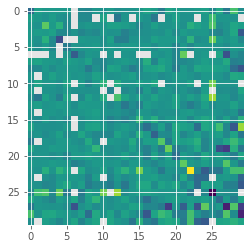

In [141]:

plt.imshow(depedence_matrix)

In [88]:
def get_max_of_genre(mtx):
    for i in range(len(mtx)):
        mtx[i][i] = mtx[i][i] - 1
        j = np.argmax(mtx[i])
        
        print(topGenres[i], topGenres[j])

In [89]:
get_max_of_genre(depedence_matrix)

Sequential Art Fantasy
Autobiography Nonfiction
Religion Nonfiction
Short Stories Fiction
Philosophy Nonfiction
Crime Mystery
Contemporary Romance Romance
Humor Fiction
Adventure Fiction
Horror Fiction
Biography Nonfiction
Novels Fiction
History Nonfiction
European Literature Fiction
Thriller Fiction
Literature Fiction
Childrens Fiction
Cultural Fiction
Science Fiction Fiction
Paranormal Fantasy
Mystery Fiction
Contemporary Romance
Classics Fiction
Historical Fiction Historical
Historical Historical Fiction
Nonfiction History
Young Adult Fantasy
Romance Fantasy
Fantasy Fiction
Fiction Fantasy


In [73]:
print(len(depedence_matrix[2]))

30


In [90]:
print(depedence_matrix)

[[0.0, 0.01853997682502897, 0.0017381228273464658, 0.007531865585168019, 0.005214368482039398, 0.007531865585168019, 0.0, 0.12282734646581692, 0.043453070683661645, 0.0816917728852839, 0.015063731170336037, 0.02549246813441483, 0.01853997682502897, 0.0011587485515643105, 0.005793742757821553, 0.004055619930475087, 0.060834298957126304, 0.028389339513325607, 0.1320973348783314, 0.05330243337195829, 0.041135573580533026, 0.005214368482039398, 0.016222479721900347, 0.028389339513325607, 0.028968713789107765, 0.051564310544611816, 0.1332560834298957, 0.14194669756662803, 0.41772885283893396, 0.40498261877172653], [0.018150879183210438, 0.0, 0.04594441293250142, 0.019285309132161088, 0.027793533749290982, 0.026091888825865002, 0.0, 0.10550198525241067, 0.039137833238797506, 0.0, 0.7470221213840046, 0.0, 0.19398752127056154, 0.022688598979013045, 0.0005672149744753262, 0.025524673851389675, 0.008508224617129892, 0.13840045377197957, 0.0, 0.0011344299489506524, 0.015314804310833806, 0.0051049

In [94]:
def compute_power(n, sigma, alpha, mu0, mua):
    standard_error = sigma / n**0.5
    h0 = stats.norm(mu0, standard_error)
    ha = stats.norm(mua, standard_error)
    critical_value = h0.ppf(1 - alpha)
    power = 1 - ha.cdf(critical_value)
    return power

In [96]:
power_matrix = []
for genre1 in topGenres:
    row = []
    print(genre1)
    for genre2 in topGenres:
        std = books[(books[genre1] == 1) & (books[genre2] == 1)]['book_rating'].std()
        num =  books[(books[genre1] == 1) & (books[genre2] == 1)]['book_rating'].count()
        m1 = books[(books[genre1] == 1)]['book_rating'].mean()
        m2 = books[(books[genre1] == 1)]['book_rating'].mean()
        
        row.append(compute_power(num, std, .05, m1, m2))
    power_matrix.append(row)

Sequential Art
Autobiography
Religion
Short Stories
Philosophy
Crime
Contemporary Romance
Humor
Adventure
Horror
Biography
Novels
History
European Literature
Thriller
Literature
Childrens
Cultural
Science Fiction
Paranormal
Mystery
Contemporary
Classics
Historical Fiction
Historical
Nonfiction
Young Adult
Romance
Fantasy
Fiction


In [97]:
get_max_of_genre(power_matrix)

Sequential Art Contemporary Romance
Autobiography Contemporary Romance
Religion Contemporary Romance
Short Stories Fantasy
Philosophy Crime
Crime Philosophy
Contemporary Romance Sequential Art
Humor Childrens
Adventure Science Fiction
Horror Autobiography
Biography Contemporary Romance
Novels Autobiography
History Contemporary Romance
European Literature Fantasy
Thriller Autobiography
Literature Contemporary Romance
Childrens Contemporary Romance
Cultural Literature
Science Fiction Autobiography
Paranormal Horror
Mystery Historical
Contemporary Romance
Classics Contemporary Romance
Historical Fiction Autobiography
Historical Literature
Nonfiction Contemporary Romance
Young Adult Horror
Romance Historical
Fantasy Romance
Fiction Autobiography


51059


In [101]:
for genre in topGenres:
    inGenre = books[books[genre] == 1]
    outGenre = books[books[genre] == 0]
    inGenreMean = inGenre['book_rating'].mean()
    outGenreMean = outGenre['book_rating'].mean()
    std = books['book_rating'].std()
    
    print(genre, compute_power(len(books), std, .975,inGenreMean, outGenreMean))

Sequential Art 0.0
Autobiography 0.45817669727805477
Religion 0.0
Short Stories 1.0
Philosophy 0.0
Crime 1.0
Contemporary Romance 0.0
Humor 1.0
Adventure 0.0
Horror 1.0
Biography 0.0
Novels 1.0
History 0.0
European Literature 1.0
Thriller 1.0
Literature 1.0
Childrens 0.0
Cultural 1.0
Science Fiction 1.0
Paranormal 0.9999920737437641
Mystery 1.0
Contemporary 1.0
Classics 0.31206306292573016
Historical Fiction 1.0
Historical 1.0
Nonfiction 0.0
Young Adult 1.0
Romance 0.9999999997601845
Fantasy 0.0
Fiction 1.0


In [120]:
books[(books['Fantasy'] == 1) & (books['Fiction'] == 1)].describe()

,book_rating,book_rating_count,book_review_count,Sequential Art,Autobiography,Religion,Short Stories,Philosophy,Crime,Contemporary Romance,...,Mystery,Contemporary,Classics,Historical Fiction,Historical,Nonfiction,Young Adult,Romance,Fantasy,Fiction
count,7328.000000,7.328000e+03,7328.000000,7328.000000,7328.0,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,...,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.0,7328.000000,7328.000000,7328.0,7328.0
mean,4.006887,1.046096e+05,4010.262691,0.038619,0.0,0.009416,0.054312,0.012145,0.004094,0.002729,...,0.083925,0.019787,0.124727,0.110398,0.114902,0.0,0.299809,0.115584,1.0,1.0
std,0.273768,3.749473e+05,11788.271895,0.192698,0.0,0.096584,0.226648,0.109541,0.063857,0.052175,...,0.277294,0.139278,0.330432,0.313407,0.318925,0.0,0.458205,0.319747,0.0,0.0
min,2.810000,1.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0
25%,3.840000,1.914750e+03,107.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0
50%,4.010000,7.405500e+03,390.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1.0
75%,4.200000,3.833525e+04,1899.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.0,1.0
max,5.000000,5.588580e+06,160776.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0,1.0
